
# PROJECT 1
---
## 주제 : 다음 분기에 어떤 게임을 설계해야 할까?

###<필수질문>
1. 지역에 따라 선호하는 게임장르가 다른가?
2. 연도별 게임의 트렌드는?
3. 출고량(판매량)이 높은 게임에 대한 분석 및 시각화 프로세스

###<과정>
1. 데이터 전처리 (결측치 처리 등)
  - 판매량 부분의 k,m 과 같은 단위 통일
  - 판매량의 Nan은 0으로 처리 // 해당 데이터가 없어서 생략
  - 그 외의 Nan값은 삭제한다 (16000개의 데이터가 있기 때문에 200개의 결측치는 제거하기로 판단)

2. 데이터 분석
  1. 장르
    - 전체 중 가장 판매량이 높은 장르
    - 지역 별 선호 장르
    - 연도 별 선호 장르
  2. 플랫폼
    - 전체 중 가장 판매량이 높은 플랫폼
    - 지역 별 선호 플랫폼
    - 연도 별 선호 플랫폼
  3. 매출이 높은 게임
    - 최신 경향을 파악하기 위해 근 10년 내의 게임 분석 (장르, 플랫폼, 그 외 도메인 지식)

3. 결론


In [ ]:
# Library import
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
# 일단 import 
%matplotlib inline  

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

In [ ]:
print(mpl.__version__)
print(mpl.__file__)
print(mpl.get_configdir())
print(mpl.get_cachedir())

3.2.2
/usr/local/lib/python3.7/dist-packages/matplotlib/__init__.py
/root/.config/matplotlib
/root/.cache/matplotlib


In [9]:
!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

font = fm.FontProperties(fname=fontpath, size=9)

fm._rebuild()

# 그래프에 retina display 적용

%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정

plt.rc('font', family='NanumBarunGothic') 



In [ ]:
# 1.데이터 전처리
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/vgames2.csv')

print(df.isnull().sum())

# K,M을 포함한 판매량 단위 통일 함수
def KM_ (sales):
  if 'K' in sales:
    sales = sales.replace('K','')
    return float(sales) / 1000
  elif 'M' in sales:
    sales = sales.replace('M','')
    return float(sales)
  return float(sales)

df['NA_Sales'] = df['NA_Sales'].apply(KM_)
df['EU_Sales'] = df['EU_Sales'].apply(KM_)
df['JP_Sales'] = df['JP_Sales'].apply(KM_)
df['Other_Sales'] = df['Other_Sales'].apply(KM_)

# 결측치 삭제
df = df.dropna(axis = 0)

# 년도 단위 통일
def year(year_int):
  if (100 > year_int) & (year_int >= 22):
    year_int += 1900
  elif year_int < 22:
    year_int += 2000
  return int(year_int)

df['Year'] = df['Year'].apply(year)
df['total_sales'] = df.loc[:,'NA_Sales':'Other_Sales'].sum(axis=1)

Unnamed: 0       0
Name             0
Platform         0
Year           238
Genre           49
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64


           Genre  NA_Sales  EU_Sales  JP_Sales  Other_Sales
0         Action    866.78    517.62    156.61       184.99
1      Adventure    105.15     63.92     51.87        16.78
2       Fighting    220.35     99.90     87.14        36.15
3           Misc    399.72    209.52    104.18        73.25
4       Platform    446.06    200.94    130.53        51.49
5         Puzzle    121.71     50.47     56.24        12.45
6         Racing    354.74    235.06     56.34        76.52
7   Role-Playing    323.93    187.14    347.27        57.52
8        Shooter    578.03    311.21     38.18       102.12
9     Simulation    181.61    112.99     63.54        31.33
10        Sports    673.05    371.87    135.03       133.35
11      Strategy     67.85     44.84     49.10        11.24


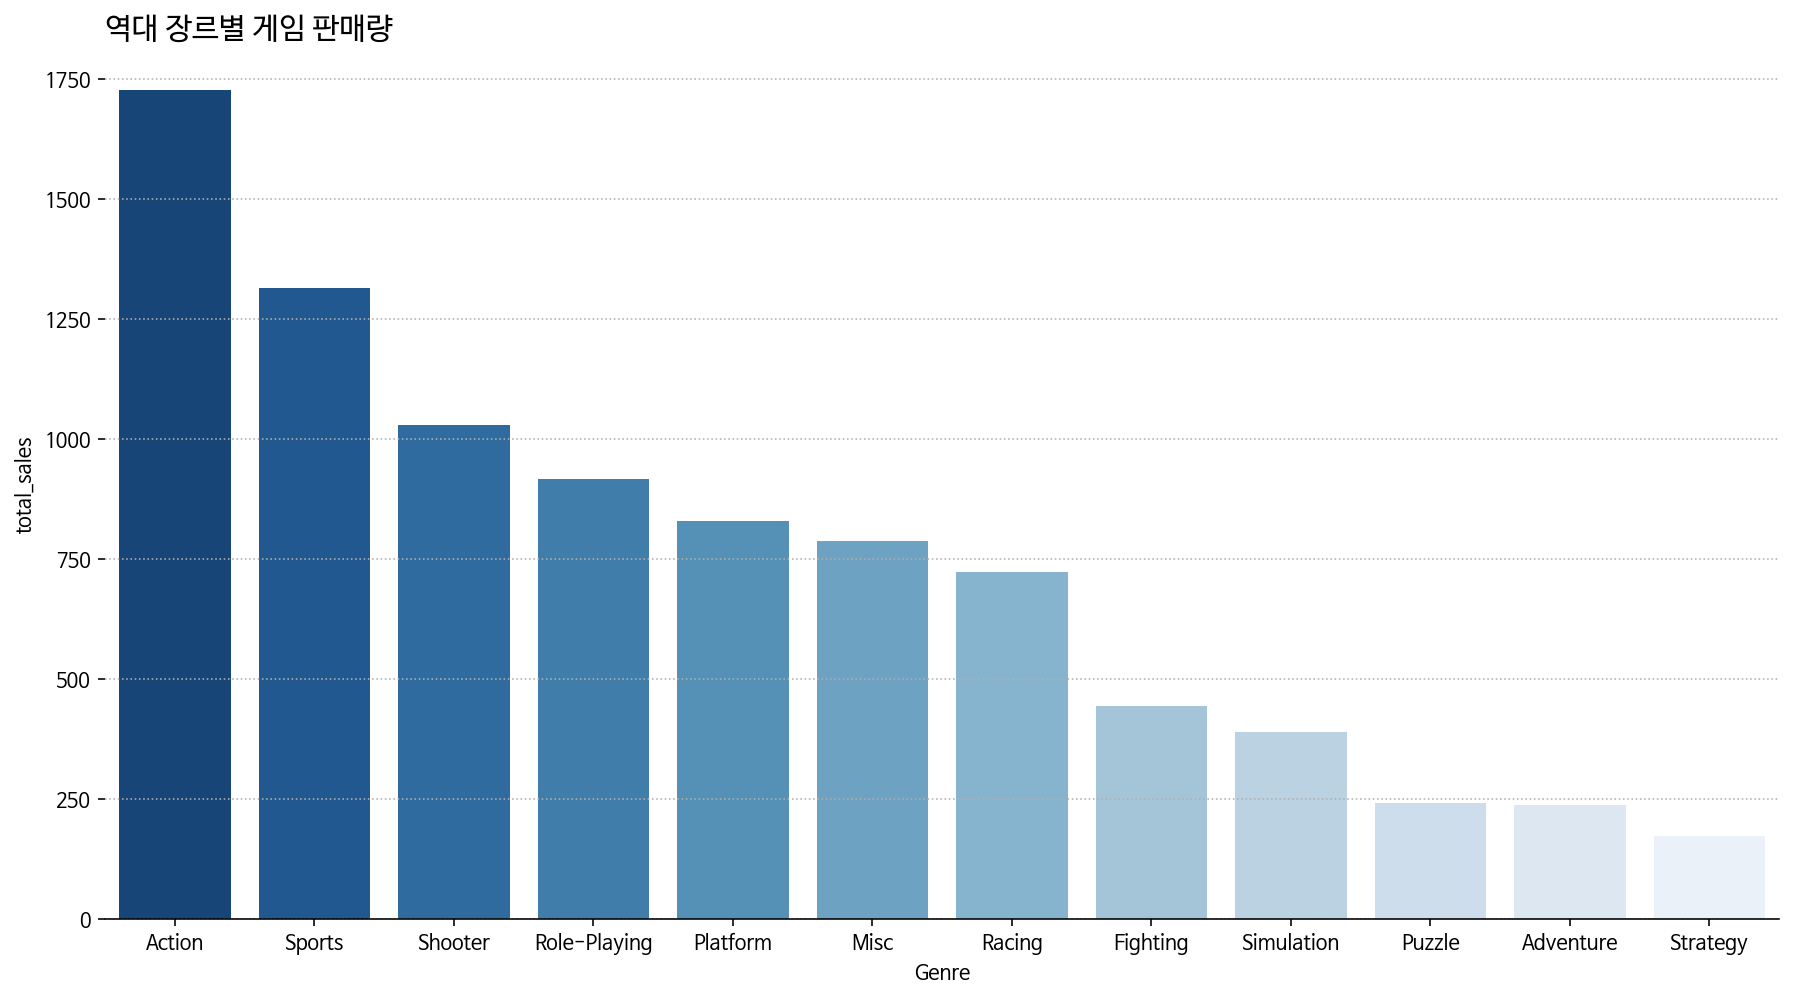

In [ ]:
# 지역별 선호 장르 bar plot으로 그려서 확인

# 각 나라에서 장르별 판매량을 합산한 데이터 생성

df_genre = df[['Genre', 'NA_Sales', 'EU_Sales','JP_Sales','Other_Sales']].copy()
df_genre = df_genre.groupby(['Genre']).sum().reset_index()
print(df_genre)
genre_melt = df_genre.melt(id_vars='Genre', value_vars=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'], 
                           var_name = 'Country', value_name = 'Sales')

# 장르별 전체 판매량
genre_sum = df_genre[['Genre']].copy()
genre_sum['total_sales'] = df_genre.sum(axis = 1)
genre_sum = genre_sum.sort_values('total_sales', ascending=False)

plt.figure(figsize = (15,8))
sns.barplot(x = 'Genre', y = 'total_sales', data = genre_sum, palette='Blues_r')
plt.title('역대 장르별 게임 판매량', size = 15, loc='left')

plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.grid(True, axis='y', linestyle=':')

plt.show()

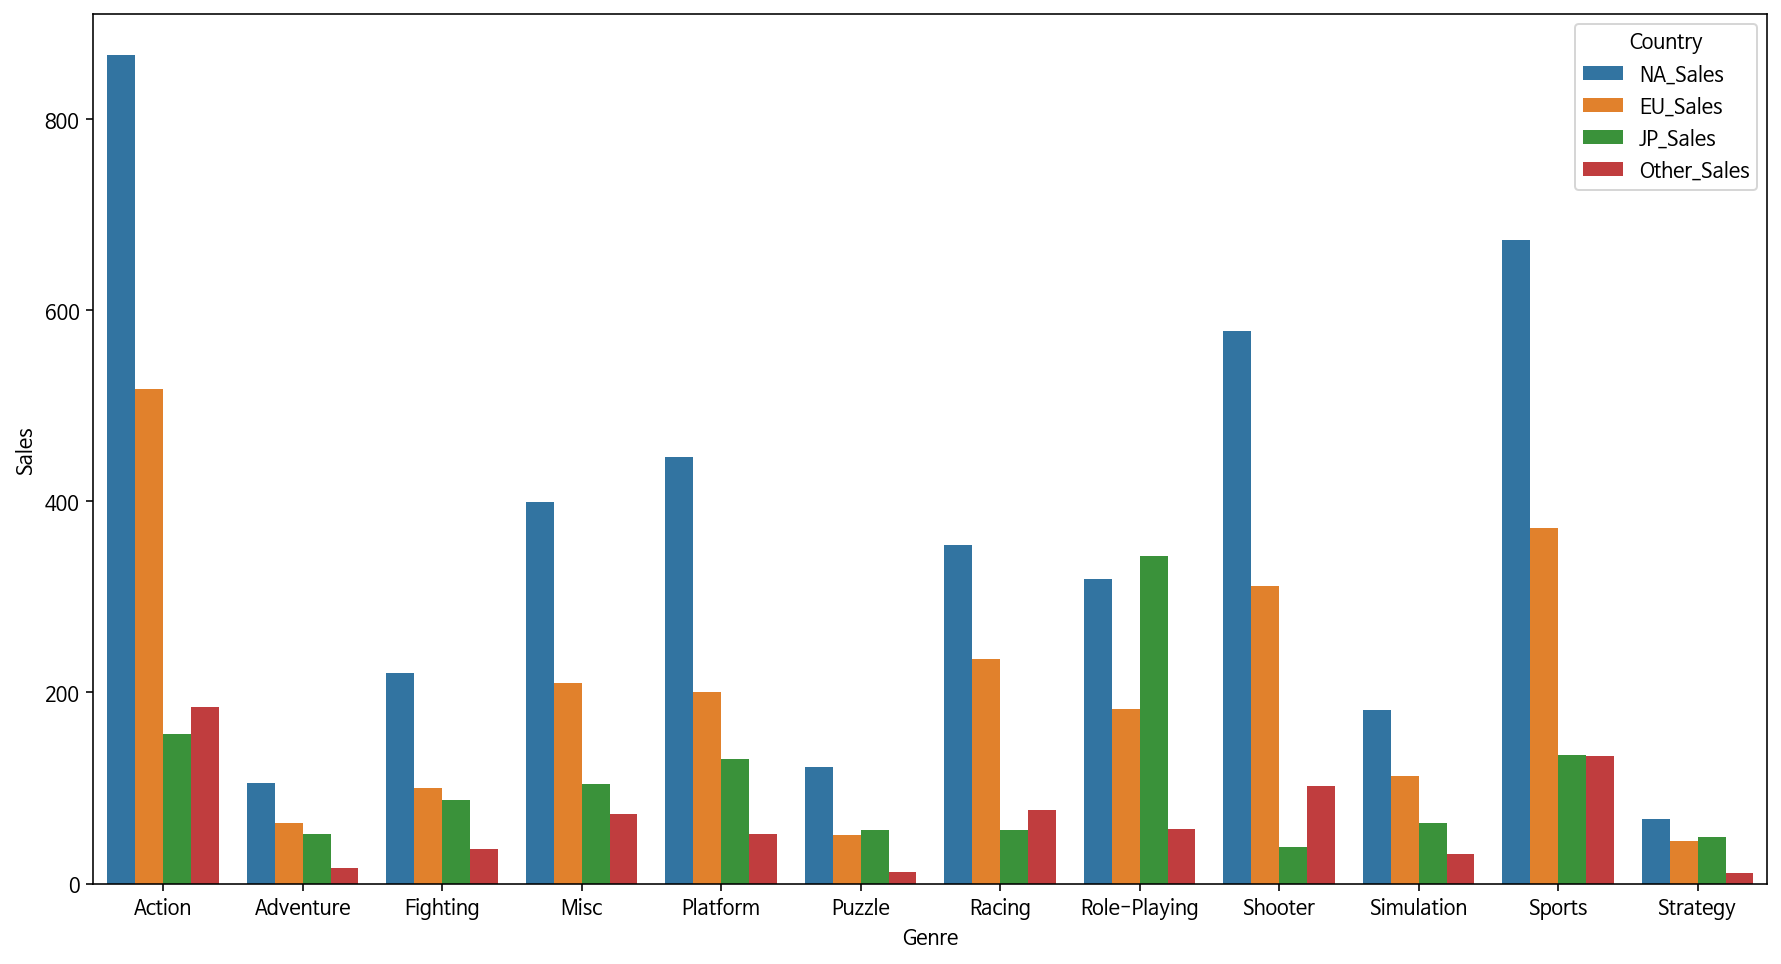

In [ ]:
plt.figure(figsize = (15,8))
sns.barplot(x='Genre', y = 'Sales', data = genre_melt, hue = 'Country')
plt.show()

# 막상 만들어보니 장르안에서 나라별 판매량 비교수치라 특정 지역내의 장르 선호도를 파악하기 어려움

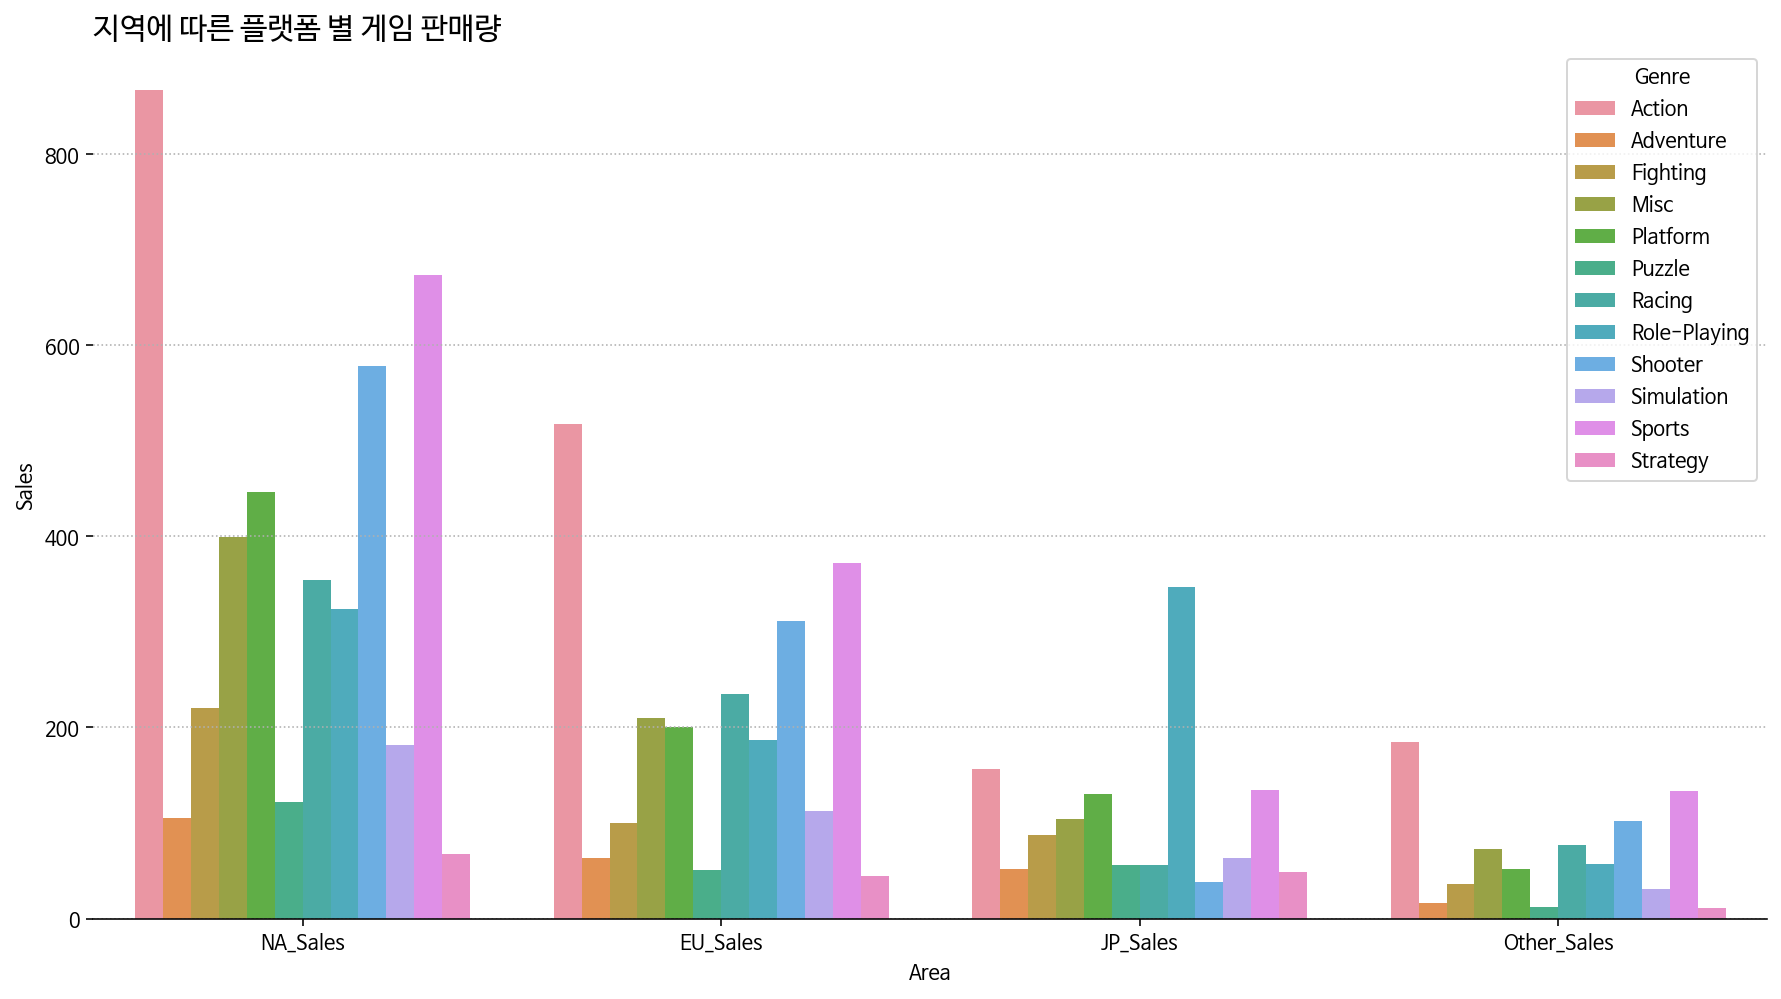

In [ ]:
# 각 지역에서 선호도가 높은 장르를 비교하기 위해 히트맵이나 기준을 나라로 하는 데이터 만들기

genreT = df_genre.T.iloc[1:].reset_index()
genreT.columns = ['Area','Action','Adventure','Fighting','Misc','Platform','Puzzle','Racing','Role-Playing','Shooter','Simulation','Sports','Strategy']
genreT_m = genreT.melt(id_vars='Area', 
            value_vars=['Action','Adventure','Fighting','Misc','Platform','Puzzle','Racing','Role-Playing','Shooter','Simulation','Sports','Strategy'],
            var_name='Genre', value_name='Sales')

plt.figure(figsize = (15,8))
sns.barplot(x='Area', y = 'Sales', hue ='Genre', data = genreT_m)
plt.title('지역에 따른 플랫폼 별 게임 판매량', size=15, loc='left')

plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.grid(True, axis='y', linestyle=':')

plt.show()

### 북미와 유럽, 그 외 국가의 선호도 
- **1순위는 Action, 2순위는 Sports, 3순위는 Shooter** 
게임이라는 것을 알 수 있다.

### 일본
- **Role-Playing 게임이 1순위**로 가장 높고 그 다음은 다른 나라와 동일하게 **Action, Sports 순서**인 것을 알 수 있다. 
- 다른 나라에 비해 Shooter 게임은 가장 낮은 판매량을 보인다.

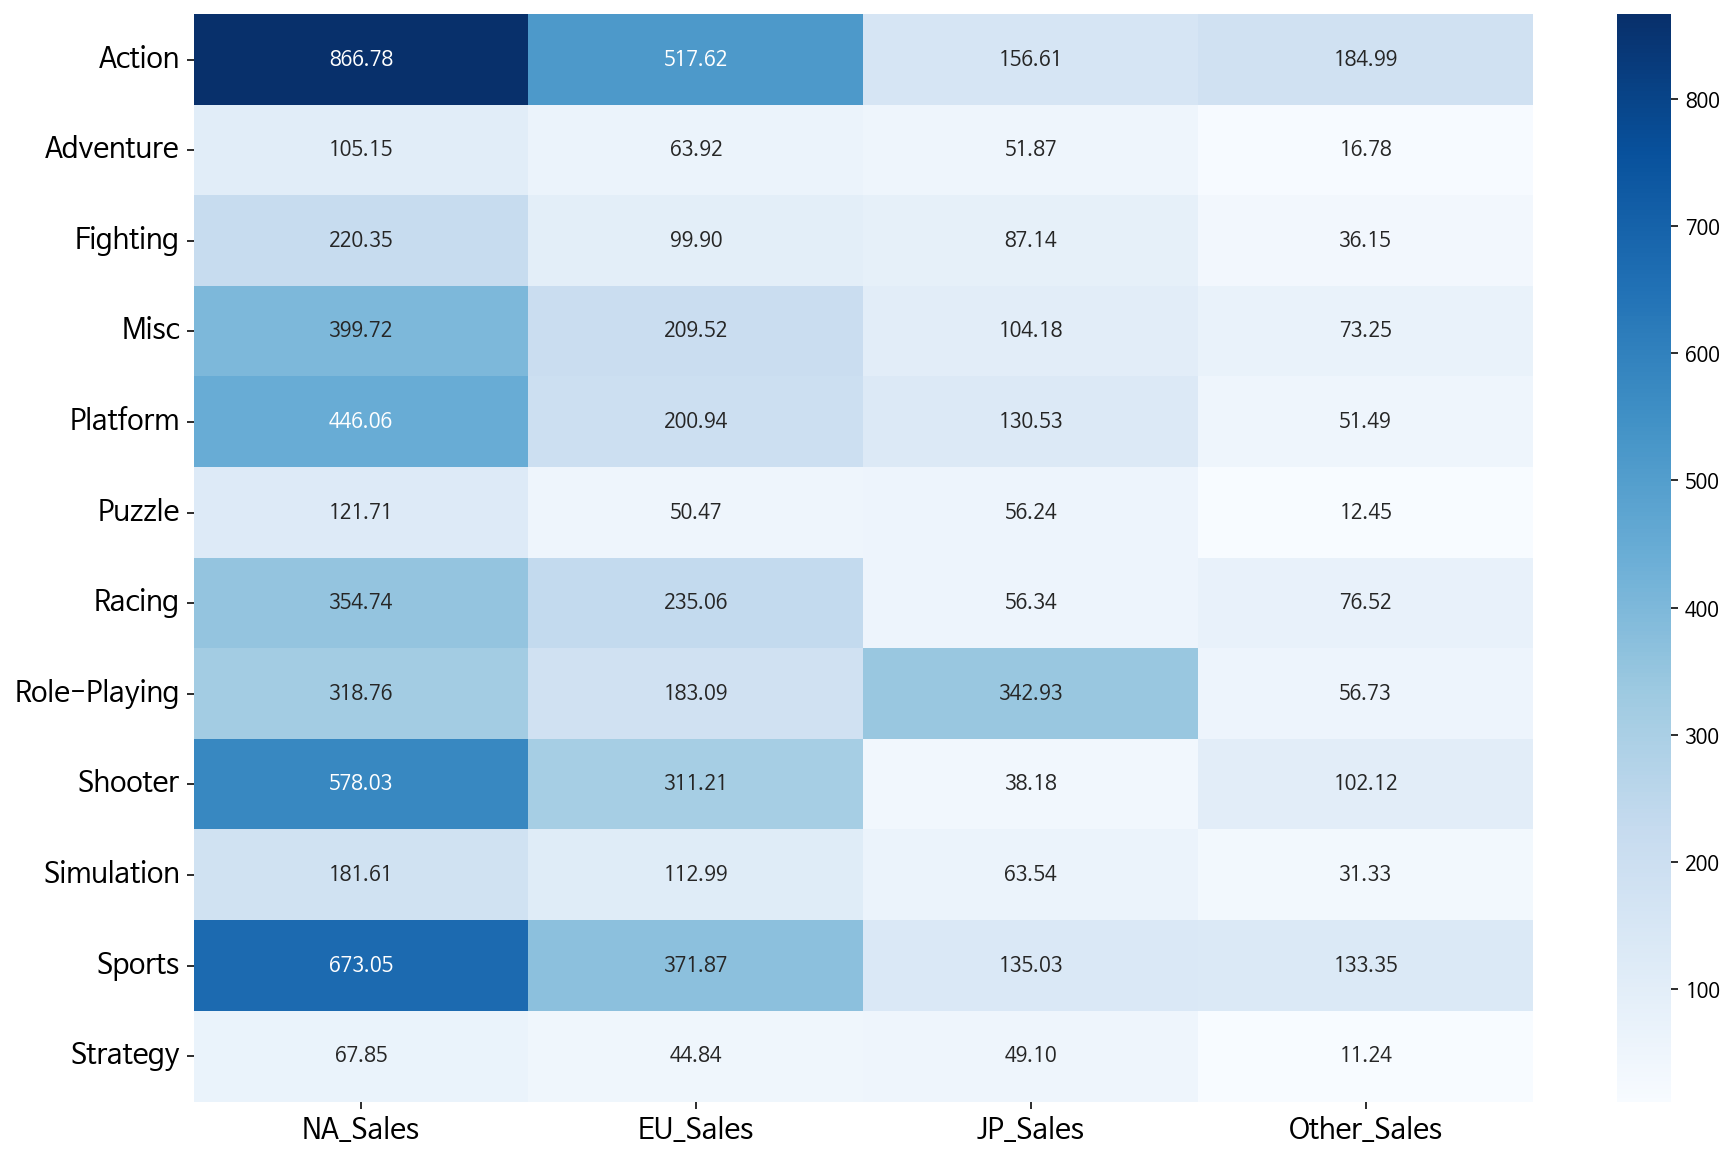

In [ ]:
# 선호도를 알아보기 위한 heatmap / pie chart가 더 적합하다고 생각했으나 데이터를 정렬하고 만드는 것이 어려워 다음에 해보는 것으로..

plt.figure(figsize=(15, 10))
genre_heat = df_genre.set_index('Genre')
a = sns.heatmap(genre_heat, annot=True, fmt = '.2f', cmap='Blues') # 소수점 두번째자리까지 표시, 색상 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
a.set_ylabel('', fontsize=12)
plt.show()

## 연도별 장르 선호도

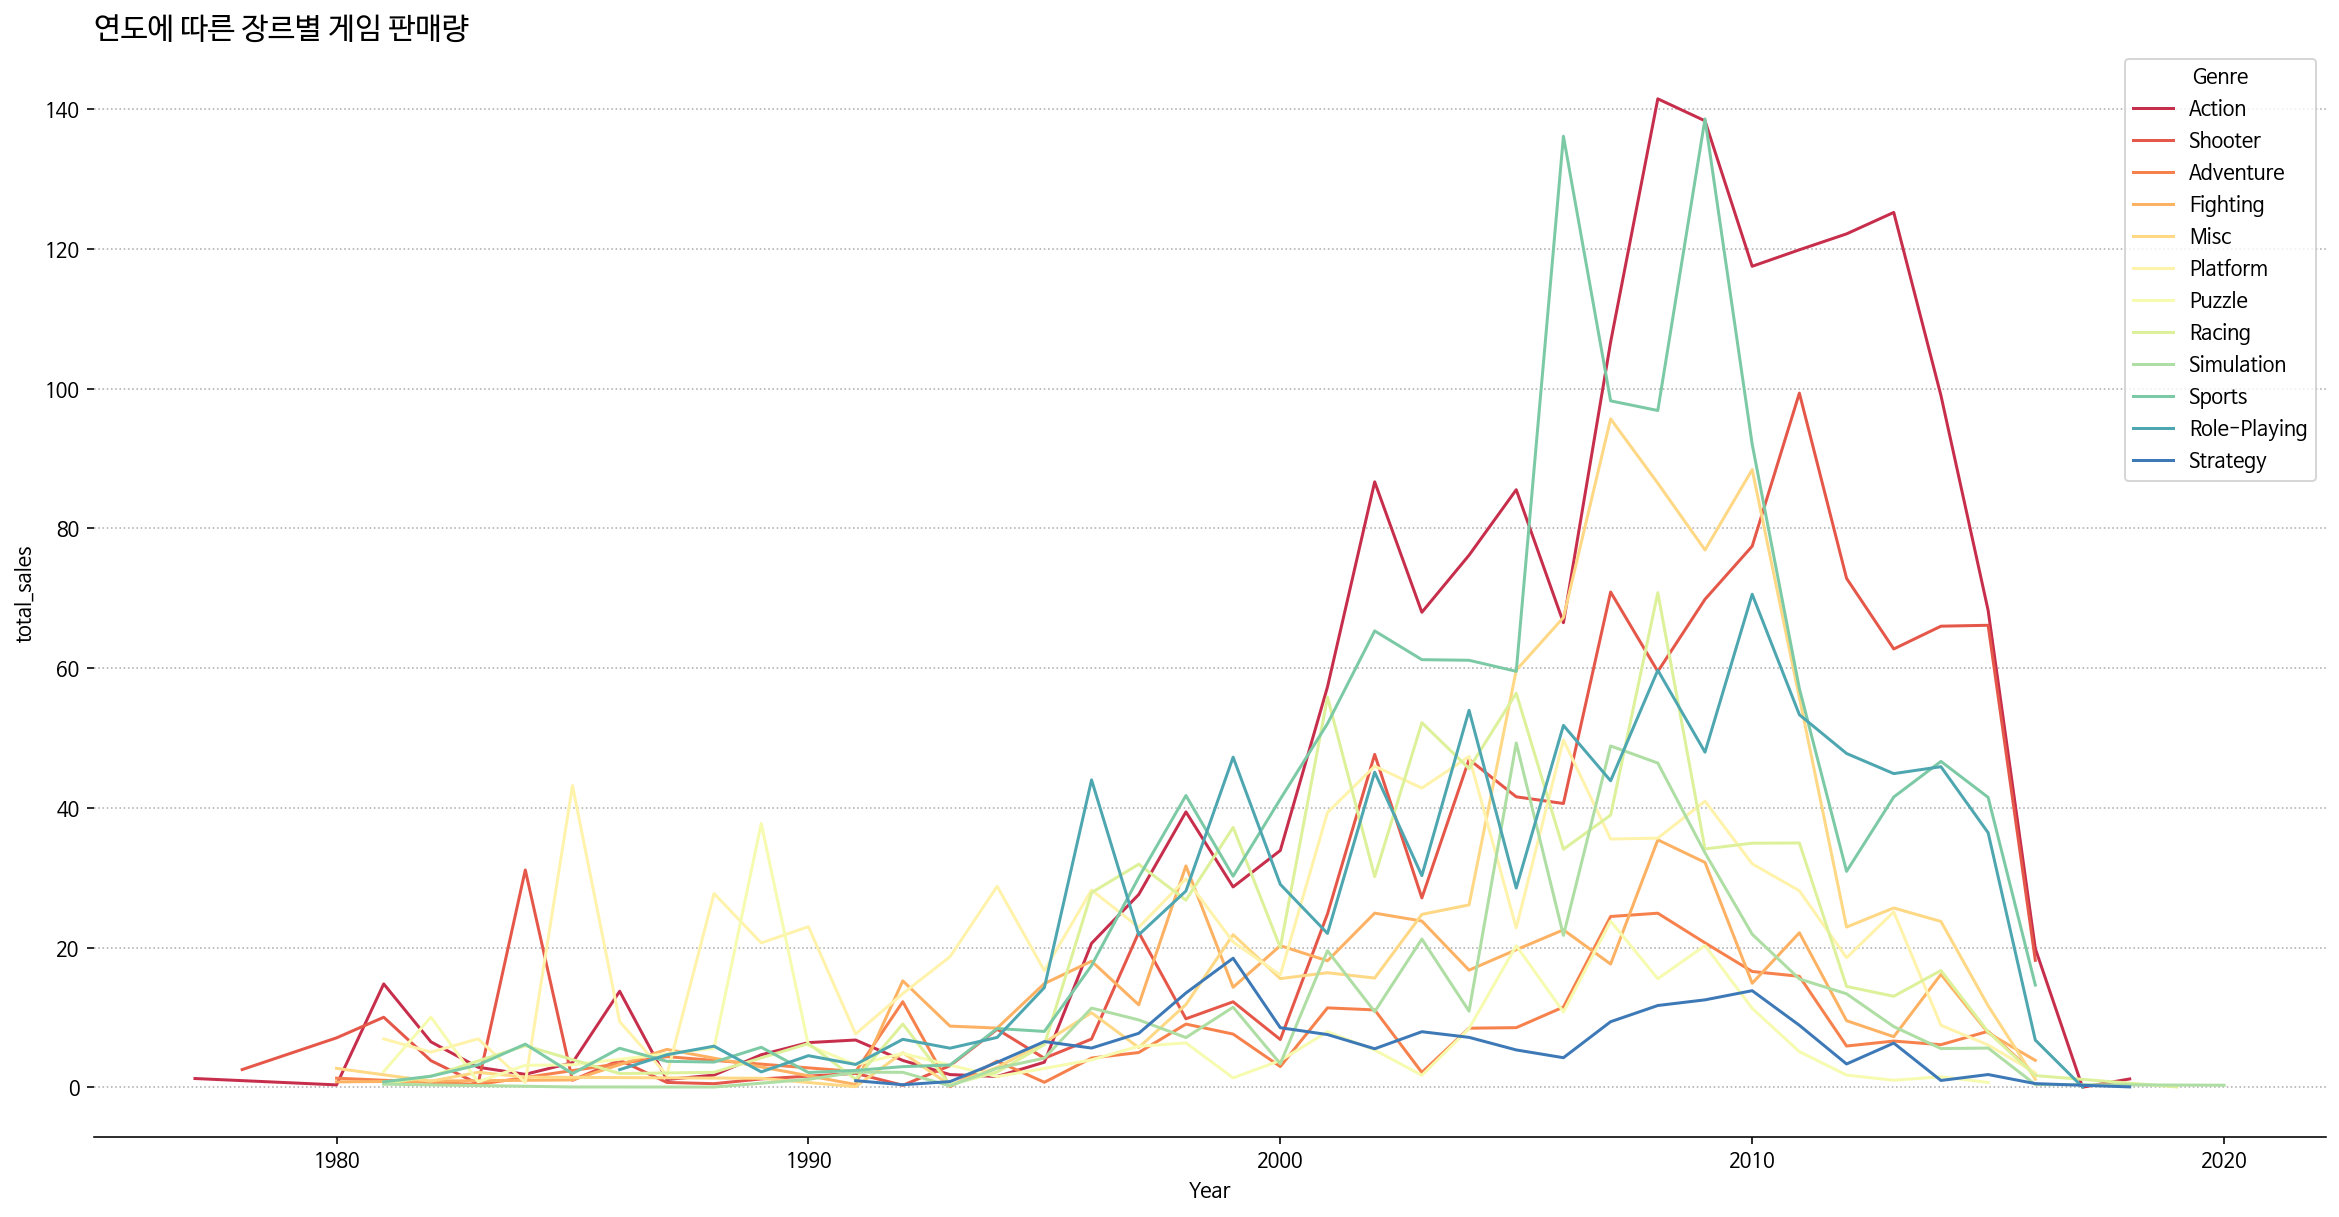

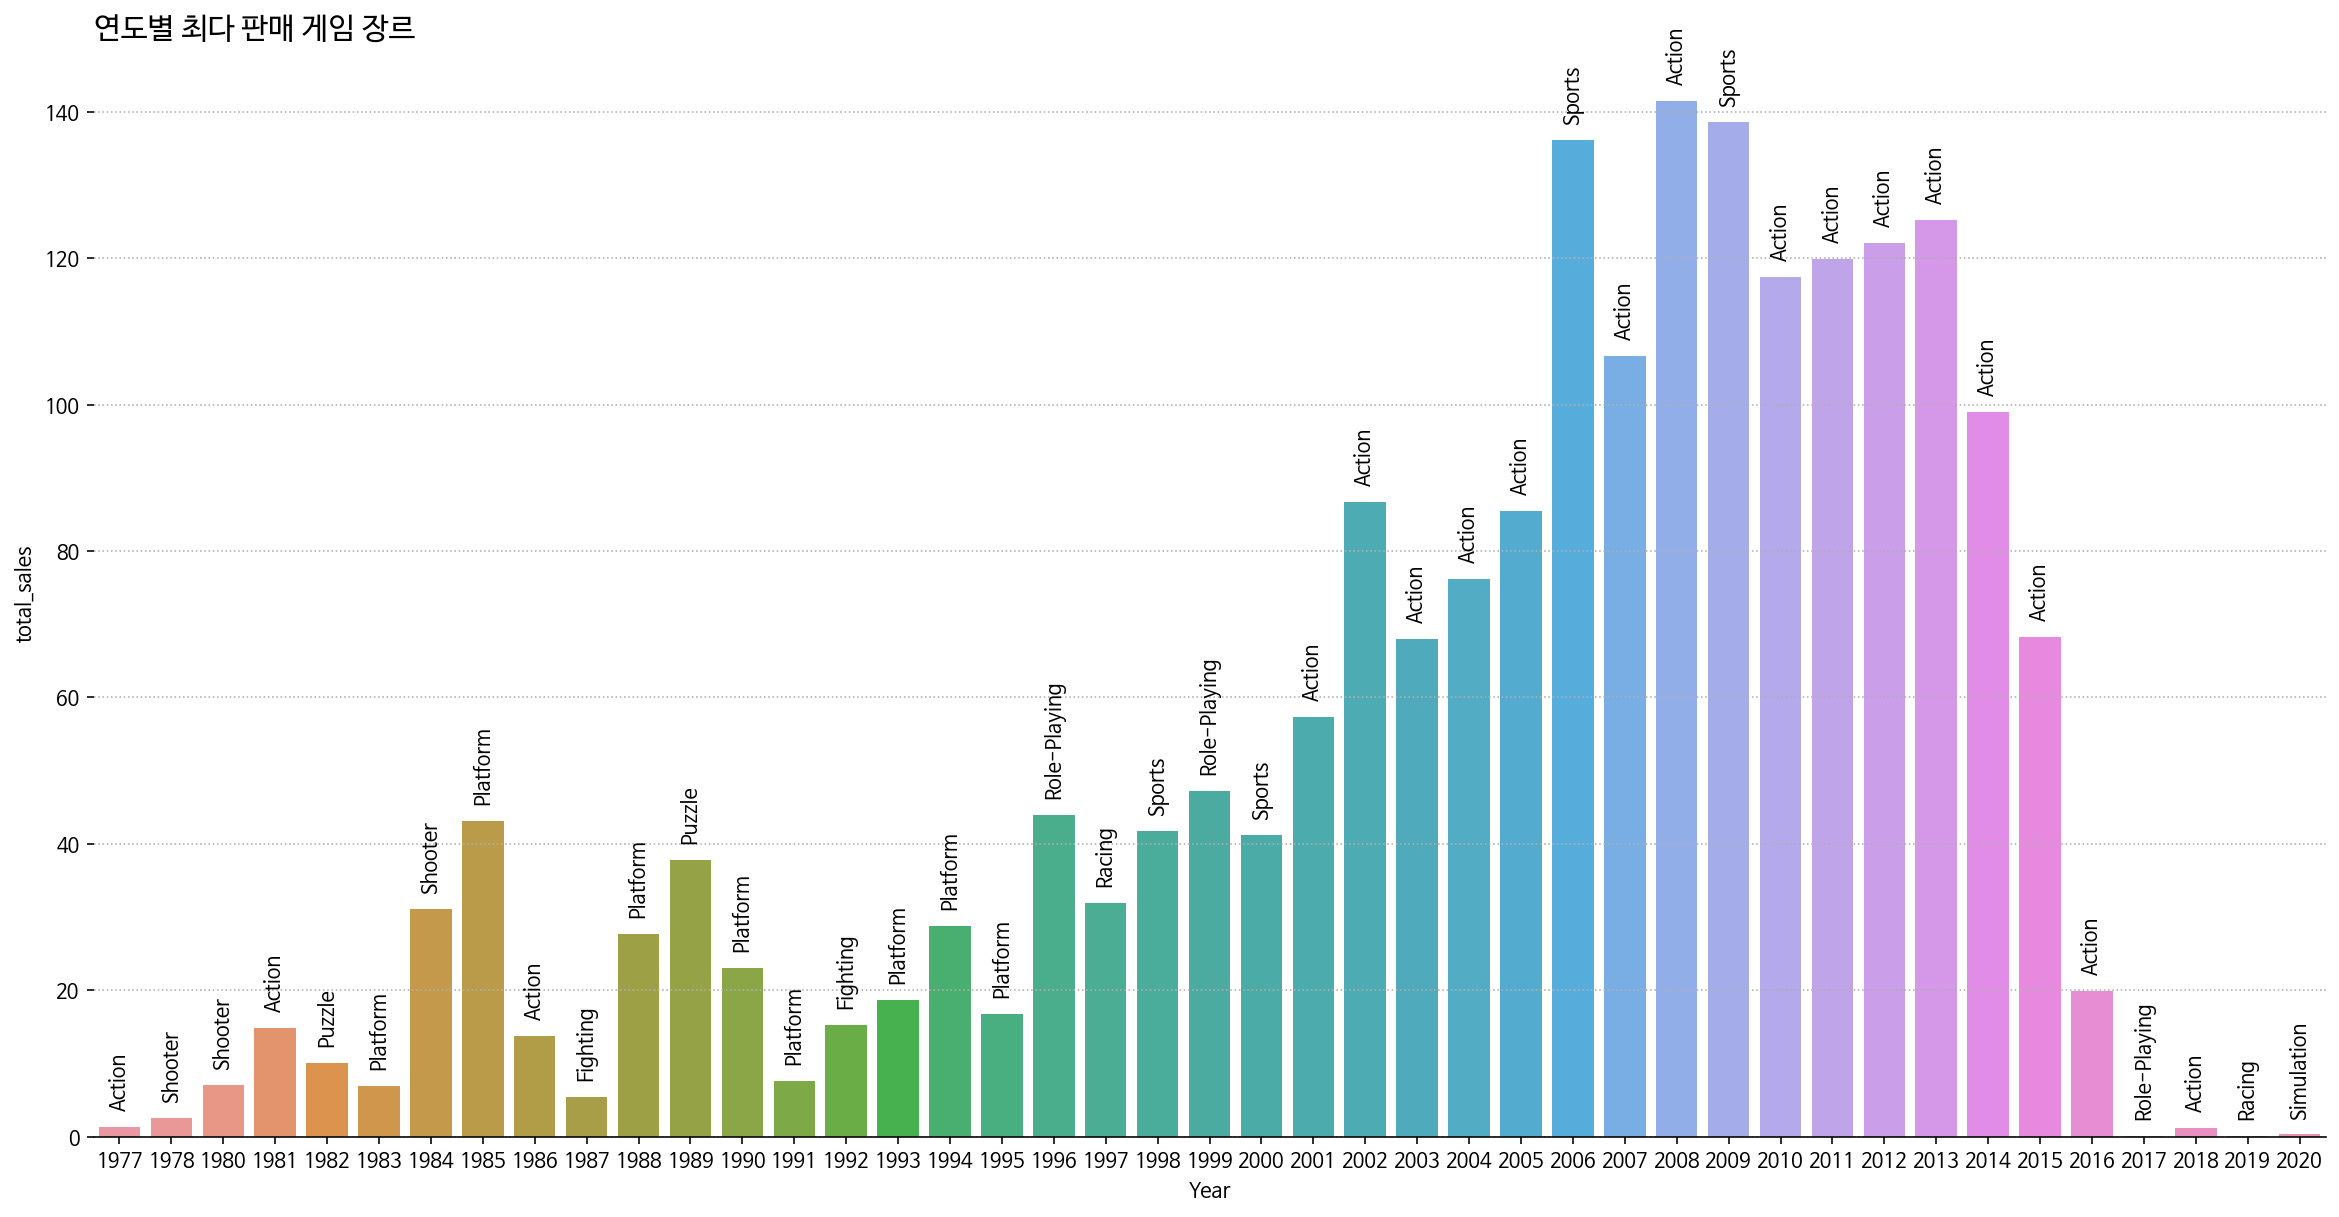

In [ ]:
# 연도에 따른 장르별 판매량

year_genre = df[['Year', 'Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']].copy()
year_genre['total_sales'] = year_genre.loc[:,'NA_Sales':'Other_Sales'].sum(axis =1)
year_genre = year_genre[['Year','Genre','total_sales']]
year_genre_max = year_genre.groupby(['Year','Genre'])['total_sales'].sum().reset_index()

# lineplot

plt.figure(figsize = (20, 10))
sns.lineplot(x = 'Year', y = 'total_sales',hue ='Genre', data=year_genre_max, palette='Spectral')
plt.title('연도에 따른 장르별 게임 판매량', size=15, loc='left')
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.grid(True, axis='y', linestyle=':')

# barplot

max_genre = year_genre_max['total_sales'] == year_genre_max.groupby(['Year'])['total_sales'].transform(max)
year_genre_max = year_genre_max[max_genre].reset_index()
genre = year_genre_max['Genre']
plt.figure(figsize = (20,10))
ax = sns.barplot(x='Year', y='total_sales', data=year_genre_max)

idx = 0
for value in year_genre_max['total_sales']:
  ax.text(x=idx, y=value +3, s=str(genre[idx]), color='black', rotation = 90, size=10, ha='center')
  idx += 1
plt.title('연도별 최다 판매 게임 장르', size = 15, loc='left')

plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.grid(True, axis='y', linestyle=':')

plt.show()

# 비율이 갑자기 이상해졌는데 이유를 모르겠다... -> figsize 재설정해서 해결
# 테두리 제거를 표마다마다 해야하는건지 한번에 모든 그래프에 적용가능한 건지 모르겠다.

2000년대 이전에는 platform 또는 puzzle 게임이 선호도가 높았는데 2000년 이후 action, sports 게임의 판매량이 높은 것으로 보아 선호도가 변했다는 것을 알 수 있다.

## 플랫폼에 따른 선호도

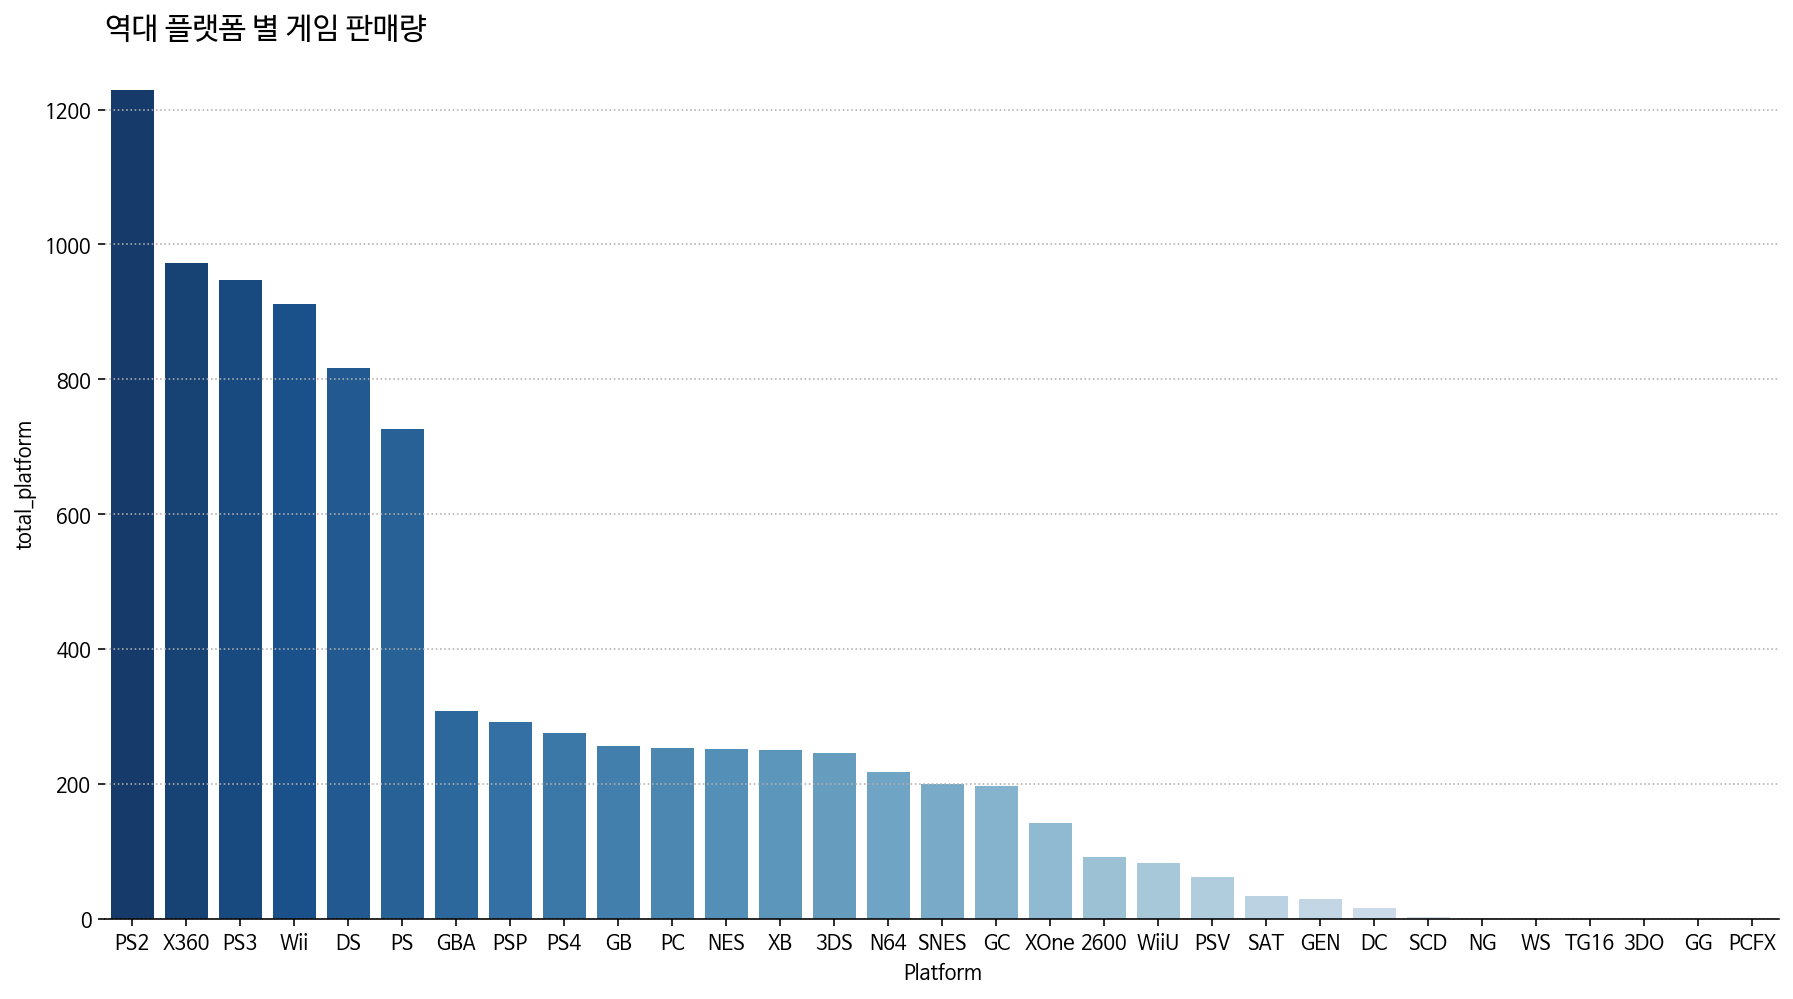

In [ ]:
# 전체 플랫폼에 대한 판매량

df_platform = df[['Platform', 'NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
df_platform = df_platform.groupby(['Platform']).sum().reset_index()
df_platform['total_platform'] = df_platform.sum(axis = 1)

plat_sum = df_platform[['Platform', 'total_platform']]
plat_sum = plat_sum.sort_values(by =['total_platform'], ascending = False)

plt.figure(figsize = (15, 8))
sns.barplot(x ='Platform', y ='total_platform', data = plat_sum, palette='Blues_r')
plt.title('역대 플랫폼 별 게임 판매량', size = 15, loc='left')
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.grid(True, axis='y', linestyle=':')

plt.show()

전 기간에 걸쳐 가장 높은 판매량을 보인 플랫폼은 ps2, 그 다음으로 x360, ps3, Wii로 분석되었다.
다만 ps3의 발매 년도가 ps2보다 후일 것으로 사료되어 이를 감안하고 데이터를 이용하고자 한다.

 - ps2 의 발매년도는 일본, 북미에서 2000년, 한국에서는 2002년이며 2013년 기준으로 1억 5,500만대가 판매되었다.
 - ps3 의 발매년도는 일본, 북미에서 2006년, 그 외 국가에서 2007년도며 2017년 기준으로 8,740만대가 판매되었다.
 - ps4 의 발매년도는 일본, 북미에서 2013년, 그 외 국가에서 2014년도며 2019년 기준으로 1억 600만대가 판매되었다. (데이터 상으로 ps4의 판매량이 낮은 이유를 분석할 것. 최신 자료가 많이 없을 수 있음.

 크게 ps, nintendo, xbox 로 나눌 수 있을 것으로 보임.

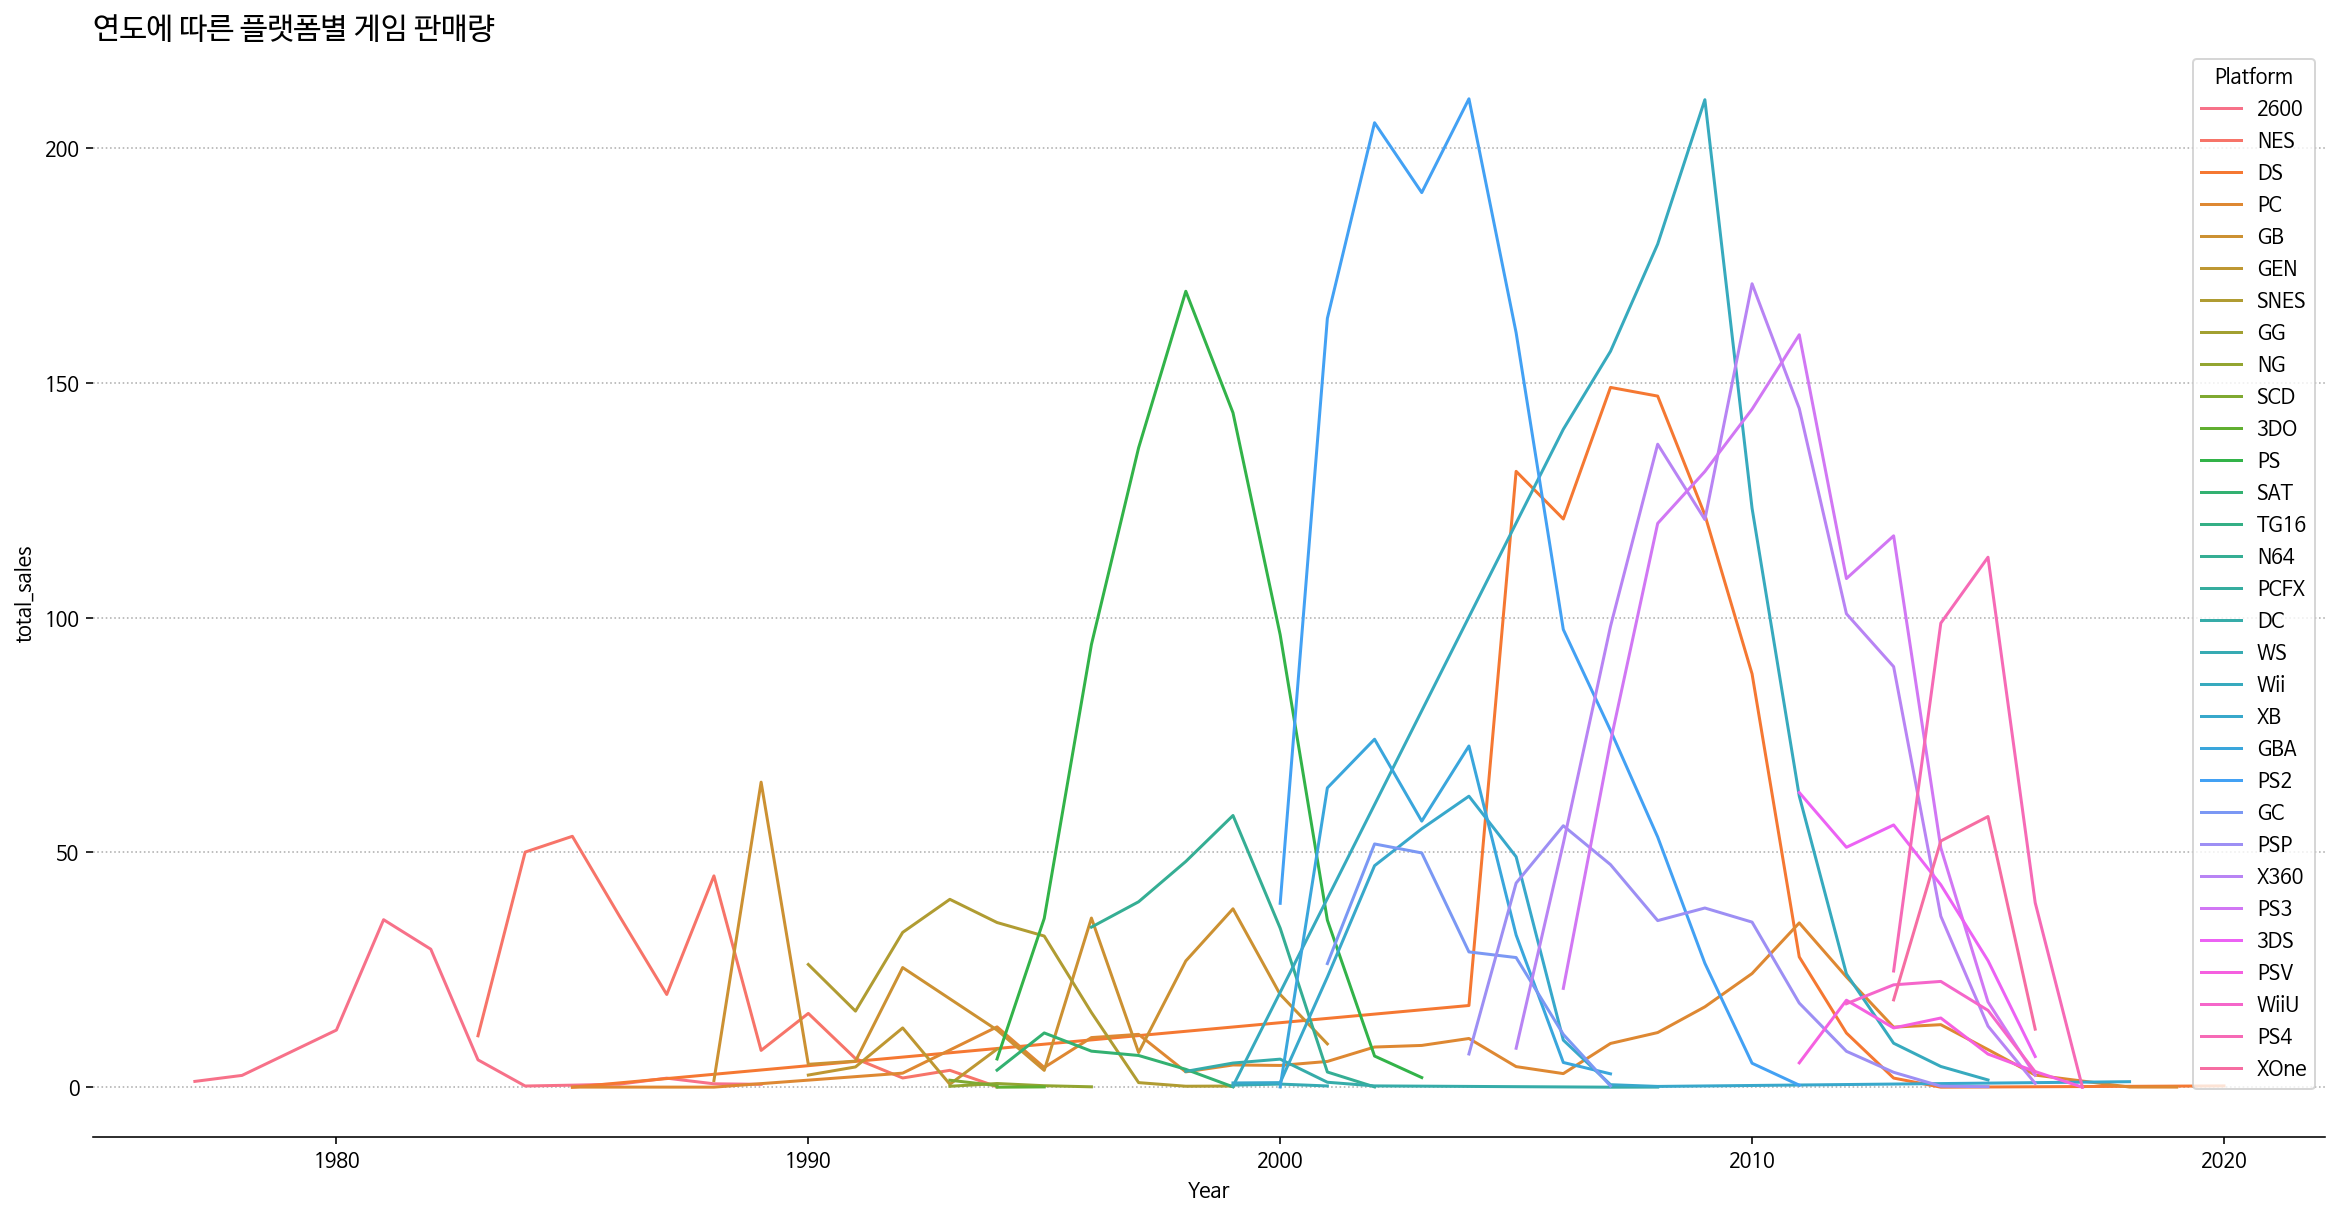

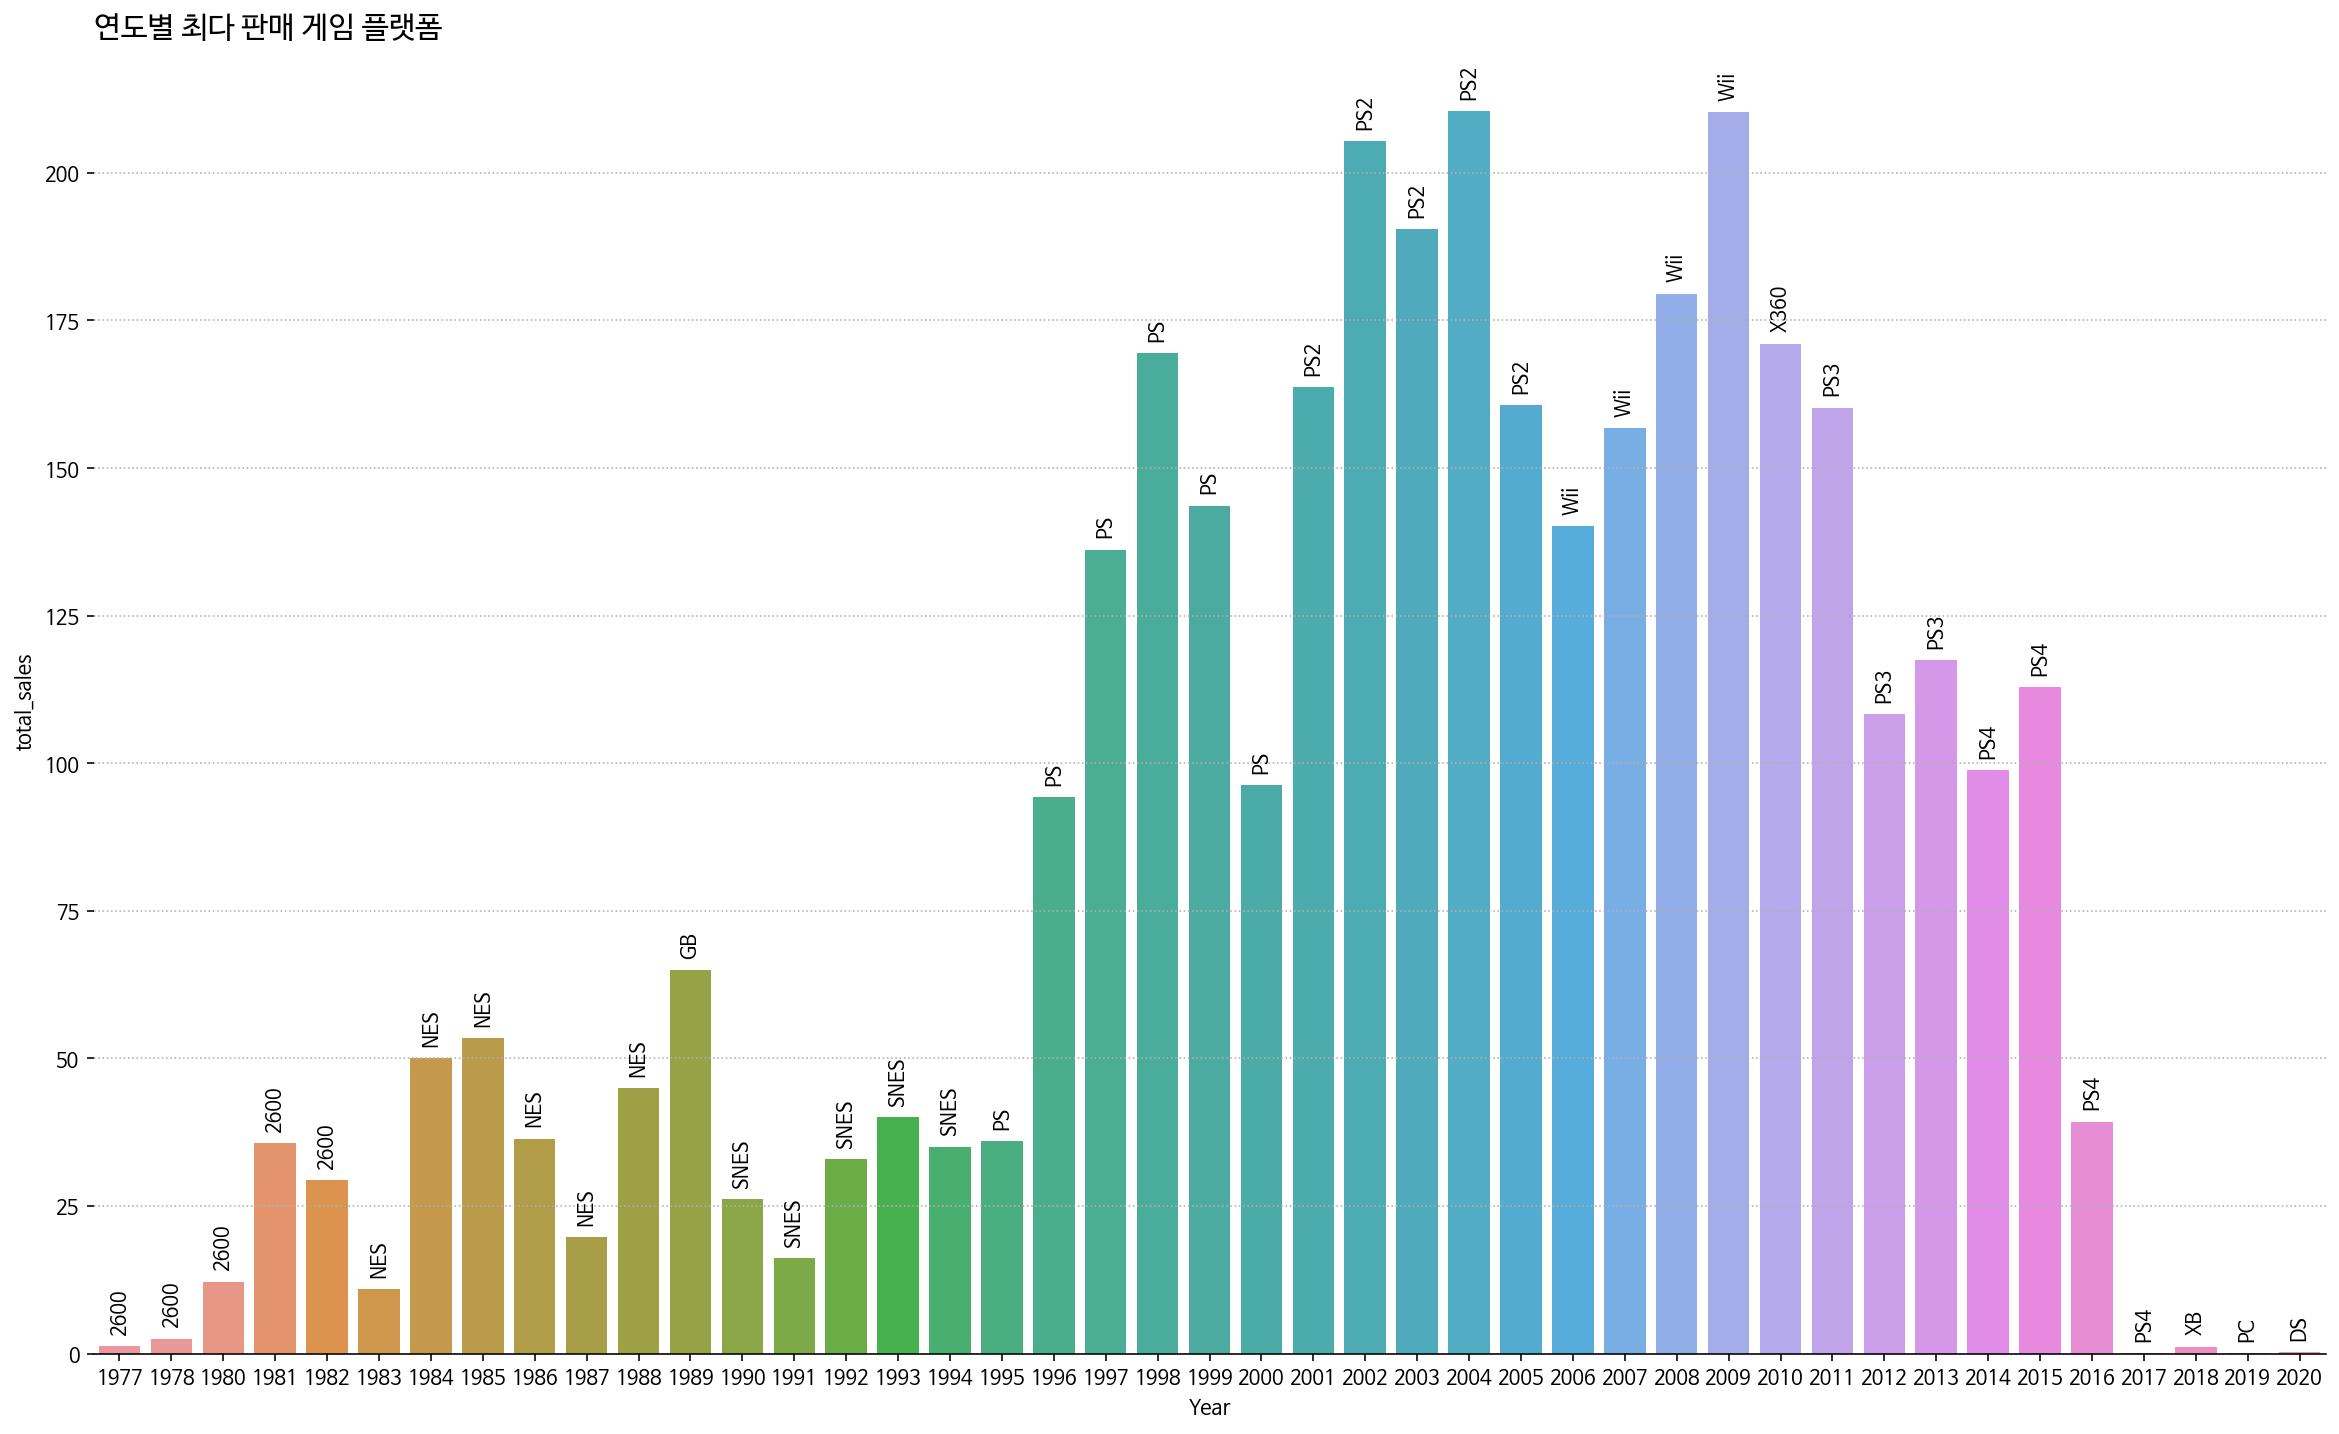

In [ ]:
# 연도별 선호 플랫폼

year_plat = df[['Year', 'Platform','NA_Sales','EU_Sales','JP_Sales','Other_Sales']].copy()
year_plat['total_sales'] = year_plat.loc[:,'NA_Sales':'Other_Sales'].sum(axis =1)
year_plat = year_plat[['Year','Platform','total_sales']]
year_plat_max = year_plat.groupby(['Year','Platform'])['total_sales'].sum().reset_index()

# lineplot
plt.figure(figsize = (20, 10))
sns.lineplot(x = 'Year', y = 'total_sales',hue ='Platform', data=year_plat_max)
plt.title('연도에 따른 플랫폼별 게임 판매량', size=15, loc='left')

plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.grid(True, axis='y', linestyle=':')

# barplot

max_plat = year_plat_max['total_sales'] == year_plat_max.groupby(['Year'])['total_sales'].transform(max)
year_plat_max = year_plat_max[max_plat].reset_index()
platform = year_plat_max['Platform']
plt.figure(figsize = (20,12))
ax = sns.barplot(x='Year', y='total_sales', data=year_plat_max)
plt.title('연도별 최다 판매 게임 플랫폼', size = 15, loc='left')
plt.grid(True, axis='y', linestyle=':')

idx = 0
for value in year_plat_max['total_sales']:
  ax.text(x=idx, y=value + 3, s=str(platform[idx]), color='black', rotation = 90, size=10, ha='center')
  idx += 1
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.show()

In [ ]:
# 최근 10년간 판매량이 높은 게임 분석
df_recent = df[df['Year'] > 2010].copy()
df_recent['total_sales'] = df.loc[:,'NA_Sales':'Other_Sales'].sum(axis=1)
recent_top10 = df_recent.sort_values(by = 'total_sales', ascending=False)[:10].reset_index()

recent_top10 = recent_top10.iloc[:,2:]
rank = ['Rank'+str(x) for x in range(1, 11)]
recent_top10['Rank'] = rank 

recent_top10

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales,Rank
0,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39,Rank1
1,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38,Rank2
2,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76,Rank3
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,Nintendo,5.17,4.05,4.34,0.79,14.35,Rank4
4,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24,Rank5
5,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.04,Rank6
6,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8.25,4.30,0.07,1.12,13.74,Rank7
7,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5.54,5.82,0.49,1.62,13.47,Rank8
8,Mario Kart 7,3DS,2011,Racing,Nintendo,4.74,3.91,2.67,0.89,12.21,Rank9
9,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99,Rank10


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50669 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44172 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_

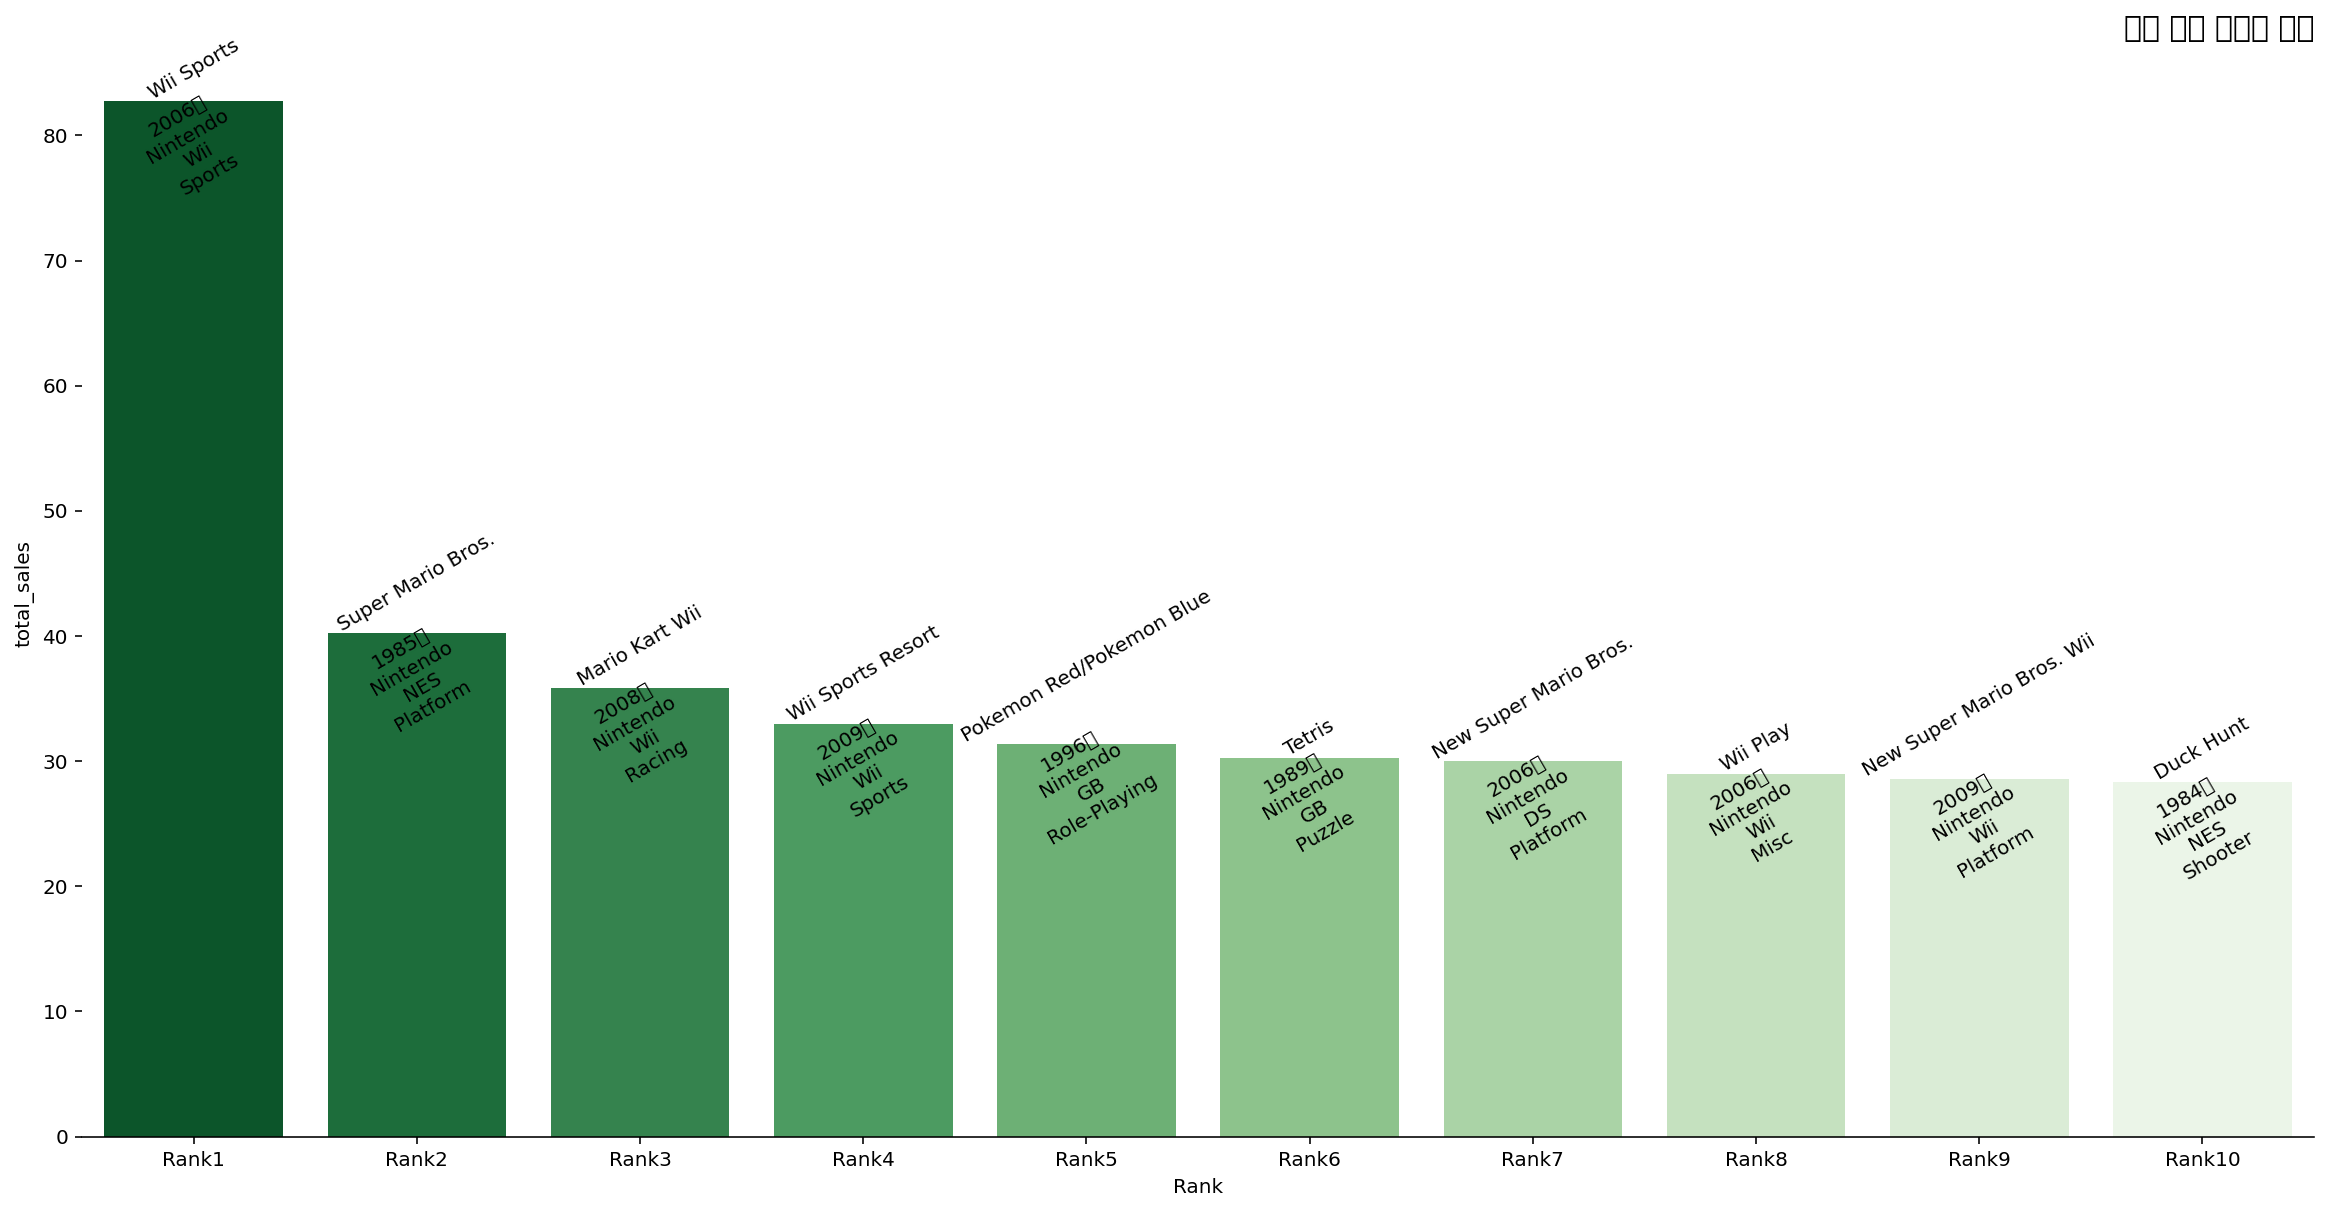

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales,Rank
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Rank1
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Rank2
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83,Rank3
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Rank4
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38,Rank5
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,Rank6
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,Rank7
7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01,Rank8
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61,Rank9
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,Rank10


In [10]:
top10 = df.sort_values(by = 'total_sales', ascending=False)[:10].copy().reset_index()
top10 = top10.iloc[:,2:]
top10['Rank'] = rank

top10

# 역대 최대 판매량 게임
plt.figure(figsize = (20,10))
ax = sns.barplot(x='Rank', y='total_sales', data=top10, palette='Greens_r')
plt.title('역대 게임 판매량 순위', size = 15, loc='right')

i = 0
for name, year, val, platform, publisher, genre in zip(top10.Name, top10.Year, top10.total_sales, 
                                                top10.Platform, top10.Publisher, top10.Genre):
  ax.text(x=i, y=val+0.2, s=(name), color='black', ha='center', rotation = 30, fontsize=10)
  ax.text(x=i, y=val-8, s=(str(year) + '년' + '\n' + publisher + '\n' + platform + '\n' + genre), color='black', rotation=30, ha='center', fontsize=10)
  i+=1
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.show()

top10.head(10)

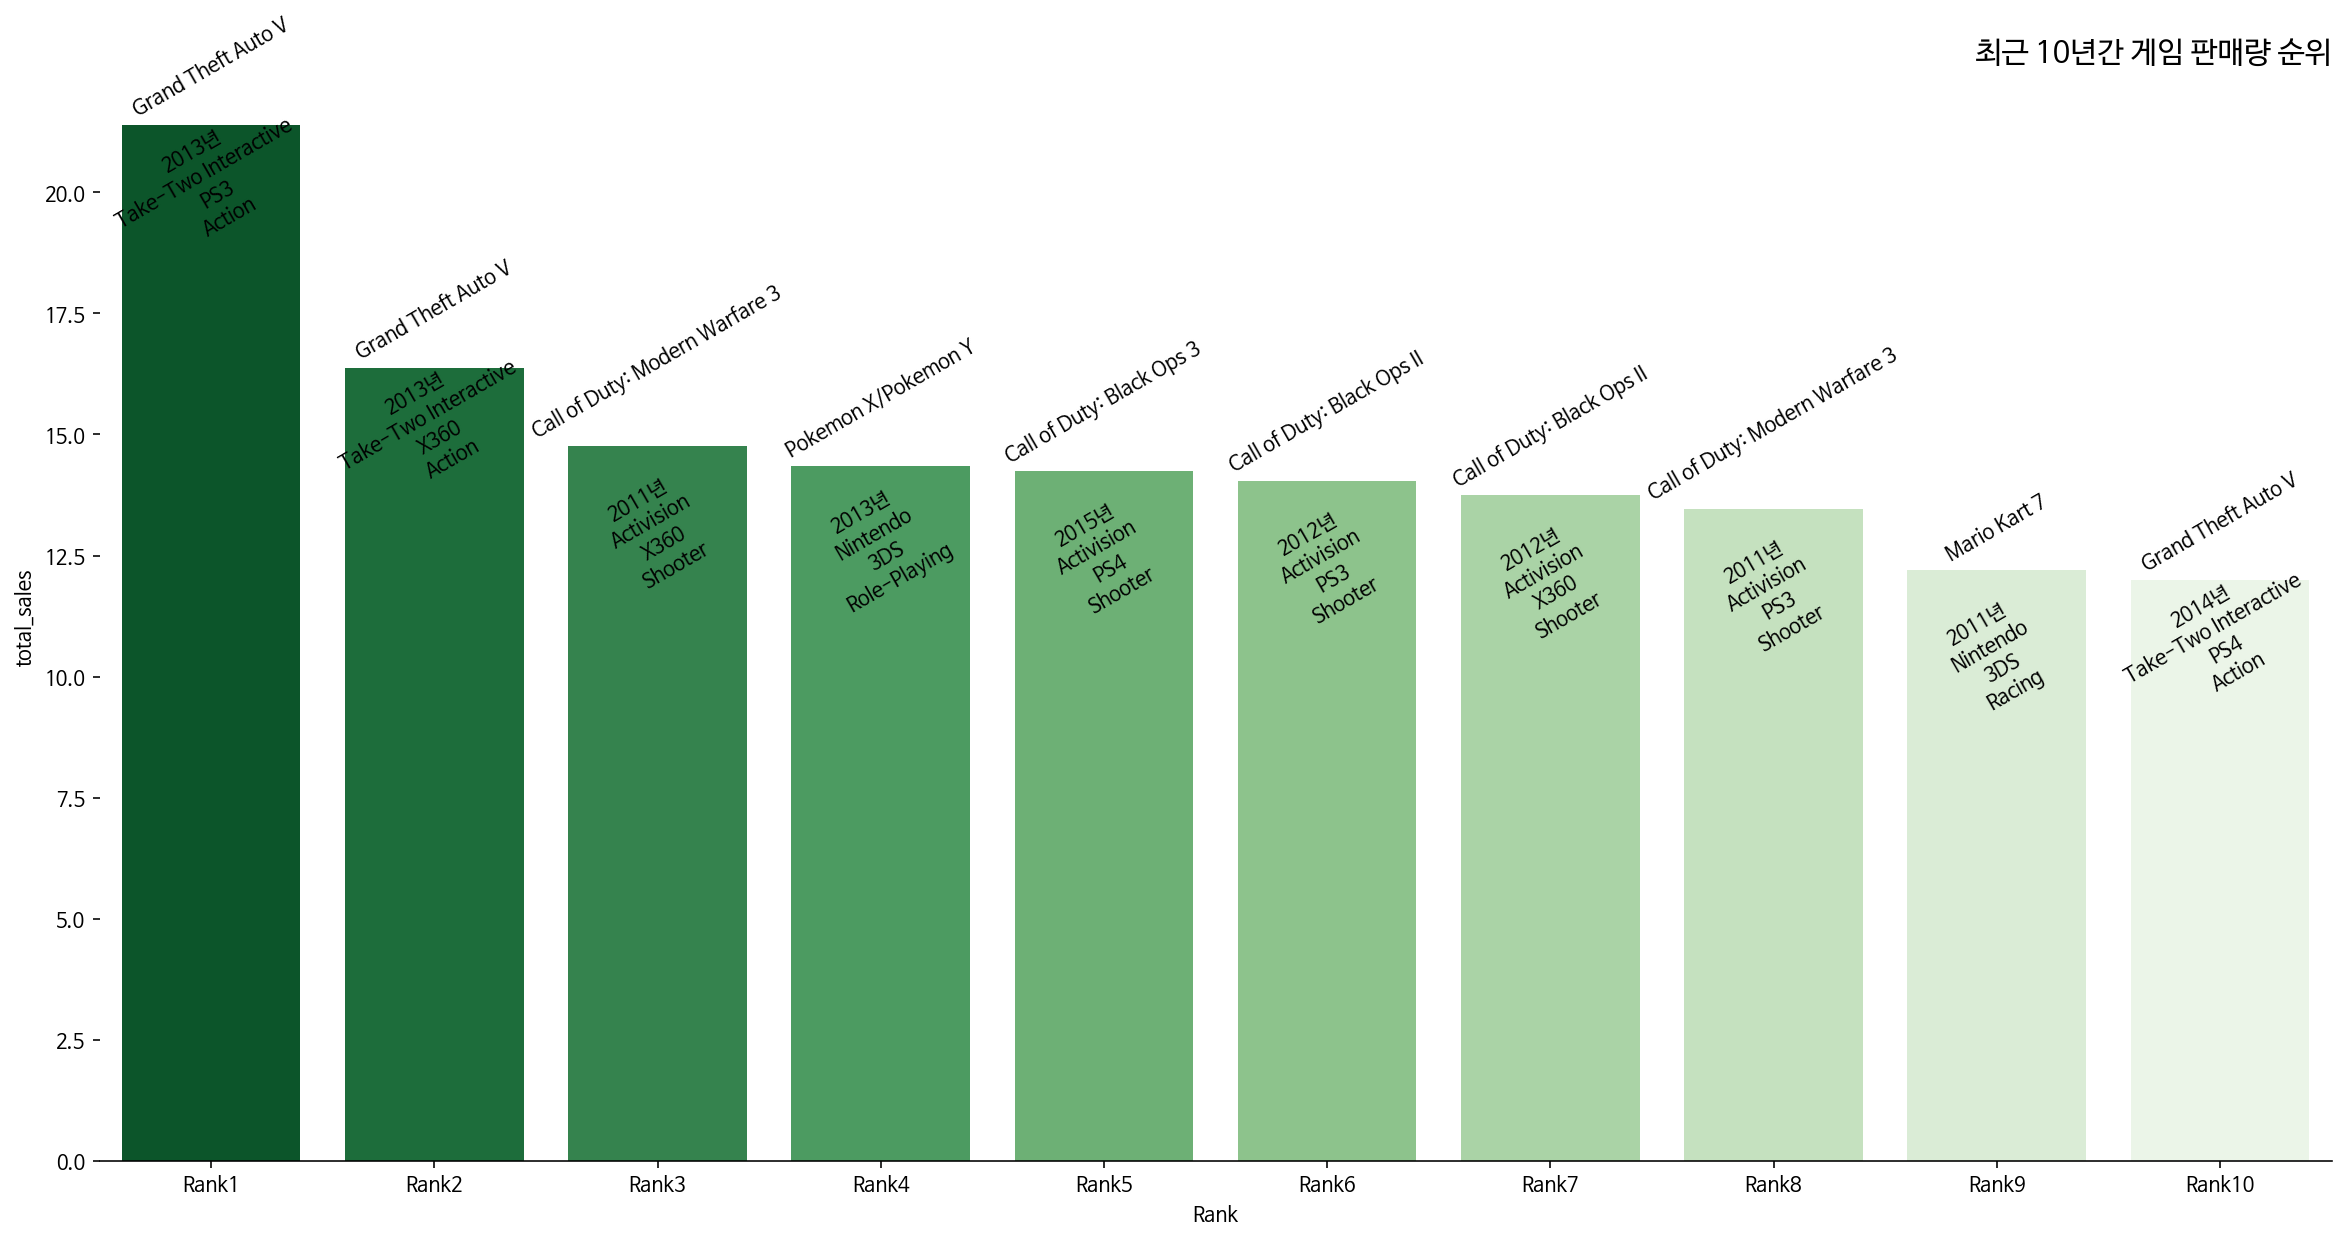

In [ ]:
# 해당 연도의 가장 많은 판매량을 기록한 게임 / 장르, 플랫폼 비율로

plt.figure(figsize = (20,10))
ax = sns.barplot(x='Rank', y='total_sales', data=recent_top10, palette='Greens_r')
plt.title('최근 10년간 게임 판매량 순위', size = 15, loc='right')

i = 0
for name, year, val, platform, publisher, genre in zip(recent_top10.Name, recent_top10.Year, recent_top10.total_sales, 
                                                recent_top10.Platform, recent_top10.Publisher, recent_top10.Genre):
  ax.text(x=i, y=val+0.2, s=(name), color='black', ha='center', rotation = 30, fontsize=10)
  ax.text(x=i, y=val-3, s=(str(year) + '년' + '\n' + publisher + '\n' + platform + '\n' + genre), color='black', rotation=30, ha='center', fontsize=10)
  i+=1
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.show()

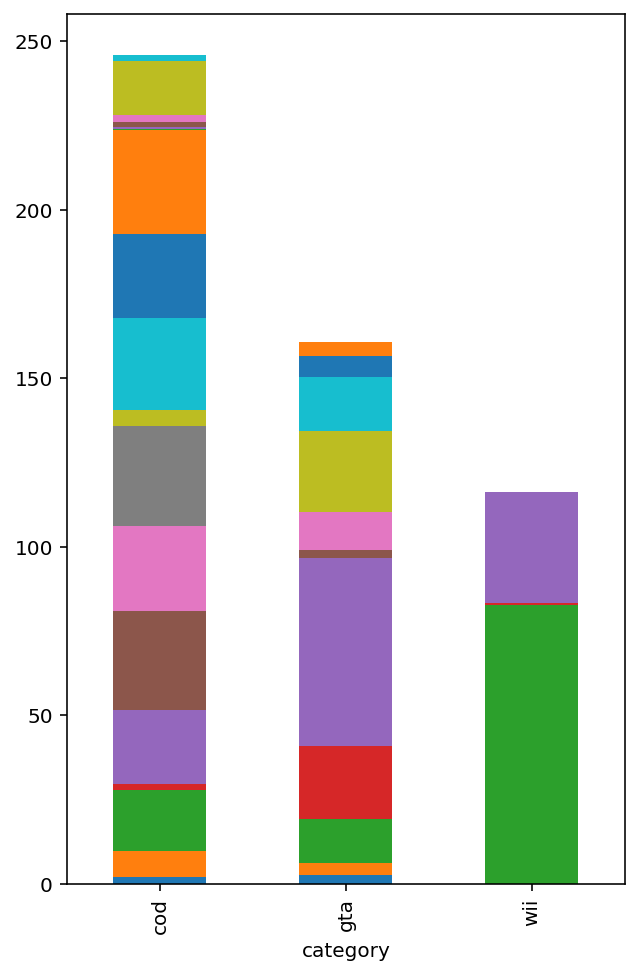

In [46]:
# gta / call of duty / wii sport

gta = df[df['Name'].str.contains('Grand Theft Auto')].copy().reset_index().iloc[:,2:]
gta['category'] = 'gta'
gta = gta[['category','Name', 'total_sales']]

wii = df[df['Name'].str.contains('Wii Sports')].copy().reset_index().iloc[:,2:]
wii['category'] = 'wii'
wii = wii[['category','Name', 'total_sales']]

cod = df[df['Name'].str.contains('Call of Duty')].copy().reset_index().iloc[:,2:]
cod['category'] = 'cod'
cod = cod[['category','Name', 'total_sales']]

stacked = pd.concat([gta, wii, cod])

pivot_df = stacked.pivot_table(index='category', columns='Name', values='total_sales',aggfunc='sum')
ax = pivot_df.plot.bar(stacked=True, figsize=(5,8))
ax.get_legend().remove()

plt.show()


In [49]:
cod

,category,Name,total_sales
0,cod,Call of Duty: Modern Warfare Trilogy,0.02
1,cod,Call of Duty: Modern Warfare Trilogy,0.01
2,cod,Call of Duty: Black Ops 3,14.24
3,cod,Call of Duty: Black Ops 3,7.29
4,cod,Call of Duty: Black Ops 3,1.79
5,cod,Call of Duty: Black Ops 3,1.75
6,cod,Call of Duty: Black Ops 3,0.23
7,cod,Call of Duty: Advanced Warfare,7.61
8,cod,Call of Duty: Advanced Warfare,4.44
9,cod,Call of Duty: Advanced Warfare,4.30


플랫폼 별로 같은 게임이 많이 출시 됨
따라서 단일 플랫폼으로는 wii가 판매량이 높을지 몰라도 다 합치면 gta나 cod같은 게임이 판매량이 더 높은 결과를 얻을 수 있다.



# 결론

북미, 유럽을 타겟으로 ps을 플랫폼으로 하는 action게임을 설계해야한다.
(단일 타겟을 노려 일본에 롤플레잉 게임을 발매하는 것도 나쁘지 않을 것 같다고 생각하지만 시간이 없어서 더 분석하지 못했다.)